In [1]:
!pip3 install labelme tensorflow==2.15.0 opencv-python matplotlib albumentations

  Using cached labelme-5.4.1.tar.gz (1.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached opencv_python-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached albumentations-1.4.2-py3-none-any.whl.metadata (36 kB)
  Using cached gdown-5.1.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached imgviz-1.7.5.tar.gz (7.7 MB)
  Preparing metadata (setup.py) ... done
  Using cached natsort-8.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached PyQt5-5.15.10-cp37-abi3-macosx_11_0_arm64.whl.metadata (2.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 8.0 MB/s eta 0:00:00
  Using cached opencv_python_headless-4.9.0.80-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached

In [2]:
import os
import time
import uuid
import cv2

In [3]:
IMAGES_PATH = os.path.join('/Users/veerchheda/coding/DL/faceDetection/data')
number_images = 30

In [4]:
if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

In [5]:
cap = cv2.VideoCapture(0)  # Initialize camera (change the index if needed)

if not cap.isOpened():
    print("Error: Failed to open camera.")
    exit()

while True:
    ret, frame = cap.read()

    if not ret:
        print("Error: Failed to capture frame.")
        break

    imgname = os.path.join(IMAGES_PATH, f'{str(uuid.uuid1())}.jpg')

    if cv2.imwrite(imgname, frame):
        print(f"Image saved as: {imgname}")
    else:
        print("Error: Failed to write image.")

    cv2.imshow('frame', frame)
    time.sleep(0.5)  # Adjust delay as needed

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4dc518ca-ef25-11ee-b0be-4efb21a06e4f.jpg


2024-03-31 11:40:00.022 Python[1801:3476560] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.


Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4e3cf0fc-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4e9356ea-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4ee47d7c-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4f360ab6-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4f87a420-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/4fda2f06-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/502f1890-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/50804d5a-ef25-11ee-b0be-4efb21a06e4f.jpg
Image saved as: /Users/veerchheda/coding/DL/faceDetection/data/50d1c43c-ef25-11ee-b0be-4efb21a06e4f.jpg


: 

In [ ]:
!labelme

/Users/veerchheda/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2024-03-29 21:23:26,576 [INFO   ] __init__:get_config:67- Loading config file from: /Users/veerchheda/.labelmerc
2024-03-29 21:23:26.995 Python[84011:3144370] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 2 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


In [3]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
from tensorflow import keras

In [7]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0']


In [8]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [9]:
images = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/data/images/*.jpg')

In [10]:
images.as_numpy_iterator().next()

b'/Users/veerchheda/coding/DL/faceDetection/data/images/6ad6208e-ede1-11ee-8be1-4efb21a06e4f.jpg'

In [11]:
def load_image(x):
    x = tf.cast(x, tf.string)
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [12]:
images = images.map(load_image)

In [13]:
images.as_numpy_iterator().next()

array([[[105,  84,  57],
        [107,  86,  59],
        [103,  81,  58],
        ...,
        [ 56,  59,  50],
        [ 57,  60,  51],
        [ 65,  68,  59]],

       [[104,  82,  58],
        [107,  85,  61],
        [106,  84,  61],
        ...,
        [ 59,  62,  53],
        [ 66,  69,  60],
        [ 73,  76,  67]],

       [[109,  84,  62],
        [109,  84,  62],
        [107,  85,  62],
        ...,
        [ 54,  57,  50],
        [ 68,  71,  64],
        [ 78,  81,  74]],

       ...,

       [[173, 122,  79],
        [165, 114,  71],
        [172, 121,  78],
        ...,
        [125, 117,  96],
        [132, 124, 103],
        [127, 119,  98]],

       [[169, 117,  77],
        [168, 116,  76],
        [171, 119,  79],
        ...,
        [110, 104,  82],
        [124, 118,  96],
        [128, 122, 100]],

       [[168, 116,  76],
        [168, 116,  76],
        [175, 123,  83],
        ...,
        [125, 119,  97],
        [120, 114,  92],
        [122, 116,  94]]

In [14]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [15]:
image_generator = images.batch(4).as_numpy_iterator()

In [16]:
plot_images = image_generator.next()

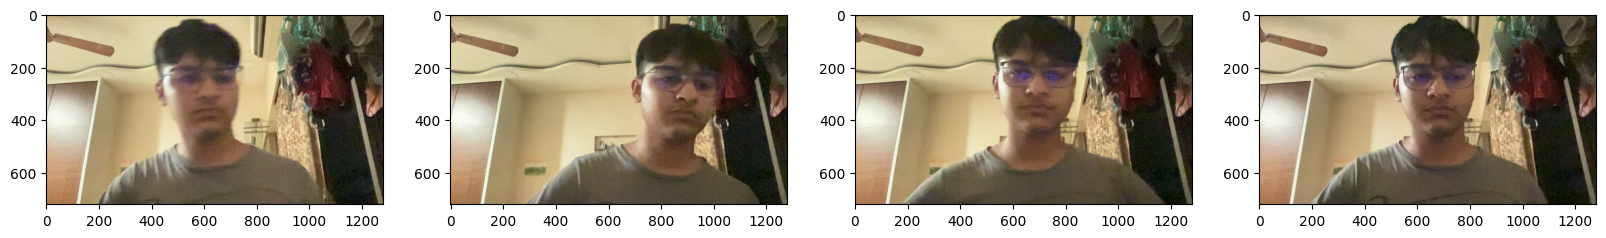

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [18]:
import os

for folder in ['train', 'test', 'val']:
    images_folder = os.path.join('data', folder, 'images')
    for file in os.listdir(images_folder):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            print(f"Moving {existing_filepath} to {new_filepath}")
            os.replace(existing_filepath, new_filepath)
        else:
            print(f"JSON file not found for image: {file}")


JSON file not found for image: 4527d49a-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 5fe522ce-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 662a5e42-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 4291a7b0-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 38432ee6-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 598accbc-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 5c15add0-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 457ca5e2-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 713a48c4-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 45d2a9a6-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 5e9fdeb8-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 5f42f972-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 5c66e2f4-ede1-11ee-8be1-4efb21a06e4f.jpg
JSON file not found for image: 43dc5bf6-ede1-11ee-8be1-4efb21a06

In [19]:
import albumentations as alb

In [20]:
img = cv2.imread('/Users/veerchheda/coding/DL/faceDetection/data/test/images/3a355c9c-ede1-11ee-8be1-4efb21a06e4f.jpg')
img.shape

(720, 1280, 3)

In [21]:
augmentor = alb.Compose([alb.Resize(width=480,height=480,always_apply=True),
                         alb.RandomCrop(width=300, height=300),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [22]:
img = cv2.imread('/Users/veerchheda/coding/DL/faceDetection/data/test/images/3a355c9c-ede1-11ee-8be1-4efb21a06e4f.jpg')
with open(os.path.join('/Users/veerchheda/coding/DL/faceDetection/data/test/labels/3a355c9c-ede1-11ee-8be1-4efb21a06e4f.json'), 'r') as f:
    label = json.load(f)

In [23]:
label['shapes'][0]['points']

[[401.2676056338028, 8.59154929577464],
 [812.5352112676056, 440.98591549295776]]

In [24]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [25]:
coords

[401.2676056338028, 8.59154929577464, 812.5352112676056, 440.98591549295776]

In [26]:
coords = list(np.divide(coords, [1280,720,1280,720]))

In [27]:
coords

[0.31349031690140844,
 0.011932707355242557,
 0.6347931338028169,
 0.6124804381846636]

In [28]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [29]:
augmented

{'image': array([[[166, 208, 221],
         [170, 212, 225],
         [171, 213, 226],
         ...,
         [139, 188, 210],
         [138, 189, 209],
         [142, 191, 213]],
 
        [[167, 207, 221],
         [169, 211, 224],
         [170, 212, 225],
         ...,
         [140, 189, 211],
         [137, 190, 210],
         [144, 193, 215]],
 
        [[171, 212, 225],
         [167, 208, 222],
         [172, 214, 227],
         ...,
         [141, 191, 212],
         [139, 190, 210],
         [143, 192, 214]],
 
        ...,
 
        [[112, 150, 195],
         [112, 150, 195],
         [110, 149, 194],
         ...,
         [ 72,  87, 102],
         [ 69,  84, 100],
         [ 61,  77,  92]],
 
        [[113, 151, 197],
         [115, 154, 199],
         [116, 154, 200],
         ...,
         [ 81,  95, 111],
         [ 73,  88, 105],
         [ 69,  85, 101]],
 
        [[118, 156, 201],
         [117, 153, 201],
         [121, 157, 205],
         ...,
         [ 76,  89,

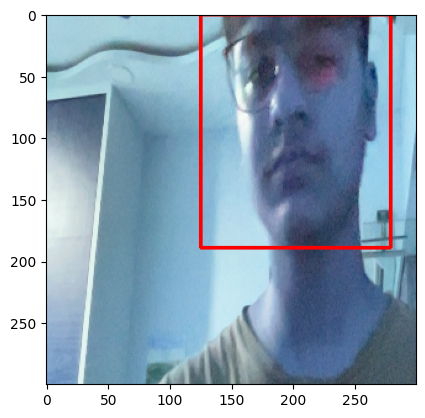

In [30]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [300,300]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [300,300]).astype(int)),
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [35]:
for partition in ['train','test','val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [1280,720,1280,720]))

        try:
            for x in range(100):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.6575520833333333, 0.5810185185185185, 0.3424479166666667, 0.002314814814814821, 'face'].


In [31]:
train_images = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [32]:
def load_and_preprocess_image(filename):
    # Read image file
    byte_img = tf.io.read_file(filename)
    # Decode image and resize
    img = tf.image.decode_image(byte_img, channels=3)
    # Ensure that the image has a valid shape
    img = tf.ensure_shape(img, (None, None, 3))
    # Resize the image
    img = tf.image.resize(img, (120, 120))
    # Normalize pixel values to [0, 1]
    img = tf.cast(img, tf.float32) / 255.0
    return img

# Assuming `test_images` is a dataset containing filenames
test_images = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/aug_data/test/images/*.jpg', shuffle=False)
# Load and preprocess images
test_images = test_images.map(load_and_preprocess_image)


In [33]:
val_images = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [34]:
train_images.as_numpy_iterator().next()

array([[[0.12843138, 0.08921569, 0.05392157],
        [0.14411765, 0.10196079, 0.0754902 ],
        [0.1615196 , 0.1252451 , 0.07132353],
        ...,
        [0.839951  , 0.785049  , 0.6066176 ],
        [0.8426471 , 0.7877451 , 0.60343134],
        [0.8375    , 0.782598  , 0.60612744]],

       [[0.14901961, 0.11960784, 0.07352941],
        [0.12254902, 0.08995098, 0.05220588],
        [0.1504902 , 0.12107843, 0.07107843],
        ...,
        [0.8384804 , 0.78357846, 0.60563725],
        [0.84583336, 0.79093134, 0.60857844],
        [0.8355392 , 0.78063726, 0.6041667 ]],

       [[0.11715686, 0.09362745, 0.03872549],
        [0.14926471, 0.13137256, 0.08553921],
        [0.15735294, 0.13946079, 0.09362745],
        ...,
        [0.8384804 , 0.78357846, 0.6071078 ],
        [0.842402  , 0.7875    , 0.6110294 ],
        [0.8372549 , 0.7823529 , 0.60588235]],

       ...,

       [[0.1625    , 0.1257353 , 0.05980392],
        [0.43308824, 0.41127452, 0.30392158],
        [0.52843136, 0

In [35]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [36]:
train_labels = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [37]:
test_labels = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [38]:
val_labels = tf.data.Dataset.list_files('/Users/veerchheda/coding/DL/faceDetection/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [39]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.355 , 0.    , 0.8384, 0.854 ], dtype=float16))

In [40]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(7600, 7600, 3100, 3100, 2500, 2500)

In [41]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [42]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [43]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [44]:
train.as_numpy_iterator().next()[1]

(array([[1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1]], dtype=uint8),
 array([[0.    , 0.    , 0.435 , 0.8203],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.3262, 0.1506, 1.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.1283, 0.1493, 0.6577, 1.    ],
        [0.    , 0.3347, 0.435 , 1.    ]], dtype=float16))

In [45]:
data_samples = train.as_numpy_iterator()

In [46]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


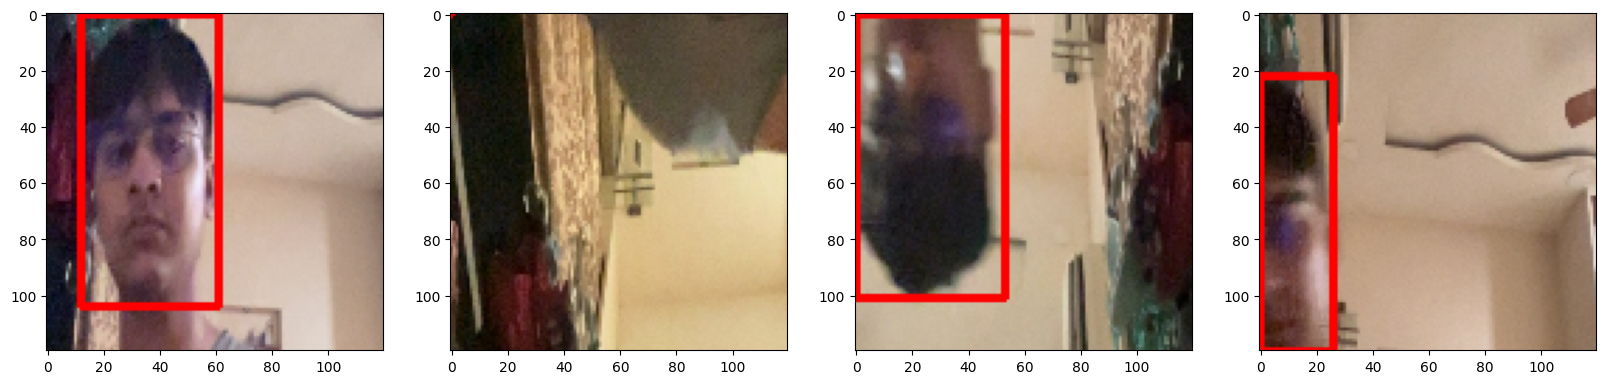

In [48]:
import copy

fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    # Create a copy of the sample image to draw rectangles on
    sample_image_with_rect = copy.deepcopy(sample_image)

    # Draw rectangle on the copied image
    cv2.rectangle(sample_image_with_rect,
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                  (255,0,0), 2)

    # Display the image with rectangle
    ax[idx].imshow(sample_image_with_rect)


In [49]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [50]:
vgg = VGG16(include_top=False)

In [51]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [52]:
def build_model():
    input_layer = Input(shape=(120,120,3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [53]:
facetracker = build_model()

In [54]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [55]:
X, y = train.as_numpy_iterator().next()

In [56]:
X.shape

(8, 120, 120, 3)

In [57]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 301ms/step


In [58]:
classes, coords

(array([[0.46235198],
        [0.53897405],
        [0.42130062],
        [0.5229354 ],
        [0.39365035],
        [0.50328803],
        [0.45219967],
        [0.5074413 ]], dtype=float32),
 array([[0.50002456, 0.597566  , 0.4364415 , 0.5961235 ],
        [0.5495277 , 0.5831451 , 0.43851238, 0.5644142 ],
        [0.56473964, 0.53386503, 0.39624542, 0.5156724 ],
        [0.519512  , 0.6131458 , 0.44491714, 0.5777973 ],
        [0.44200057, 0.6681789 , 0.46503326, 0.5466742 ],
        [0.48554486, 0.5961463 , 0.46675667, 0.5053355 ],
        [0.5111334 , 0.58090496, 0.40707535, 0.5239248 ],
        [0.5714995 , 0.6734764 , 0.4720312 , 0.5902563 ]], dtype=float32))

In [59]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [60]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.1,
    decay_steps=10000,
    decay_rate=0.9,
    staircase=True)

In [62]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule)

In [63]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))

    h_true = y_true[:,3] - y_true[:,1]
    w_true = y_true[:,2] - y_true[:,0]

    h_pred = yhat[:,3] - yhat[:,1]
    w_pred = yhat[:,2] - yhat[:,0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))

    return delta_coord + delta_size

In [64]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [65]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.536743>

In [66]:
y[0].shape

(8, 1)

In [67]:
y[1].shape

(8, 4)

In [68]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.7251656>

In [69]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=9.536743>

In [70]:
classes.shape

(8, 1)

In [71]:
coords.shape

(8, 4)

In [72]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [73]:
model = FaceTracker(facetracker)

In [74]:
model.compile(opt, classloss, regressloss)

In [75]:
logdir='logs'

In [76]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [77]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


 13/950 [..............................] - ETA: 10:07 - total_loss: 11.0115 - class_loss: 4.6064 - regress_loss: 8.7083

KeyboardInterrupt: 

In [178]:
hist.history

NameError: name 'hist' is not defined

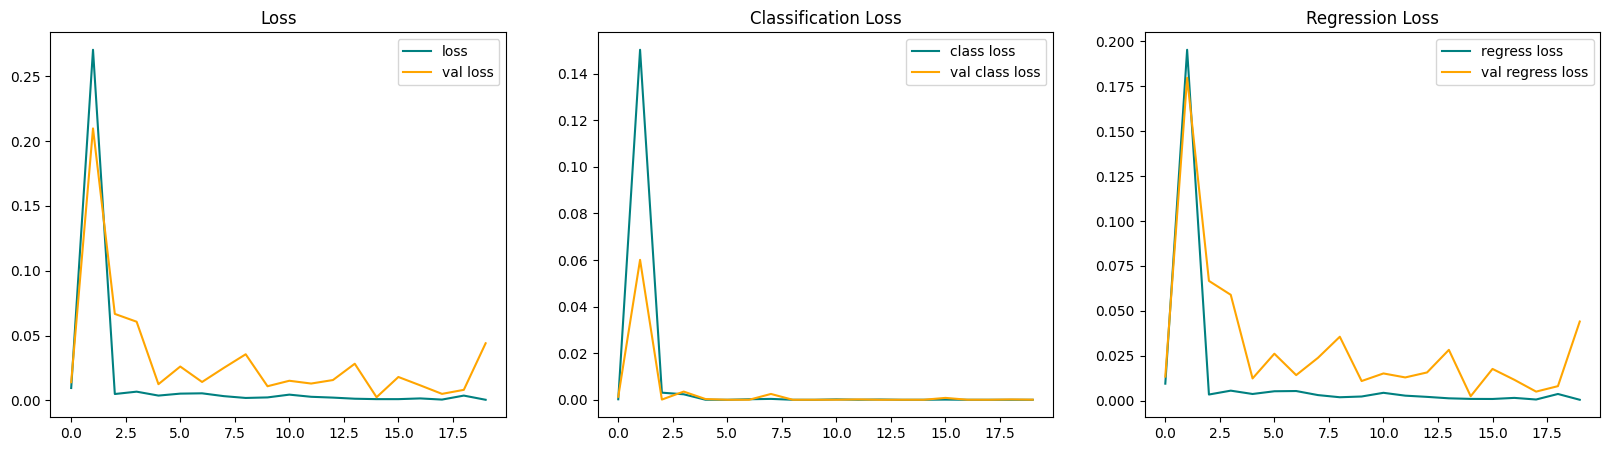

In [180]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

In [181]:
test_data = test.as_numpy_iterator()

In [182]:
test_sample = test_data.next()

In [183]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 30ms/step


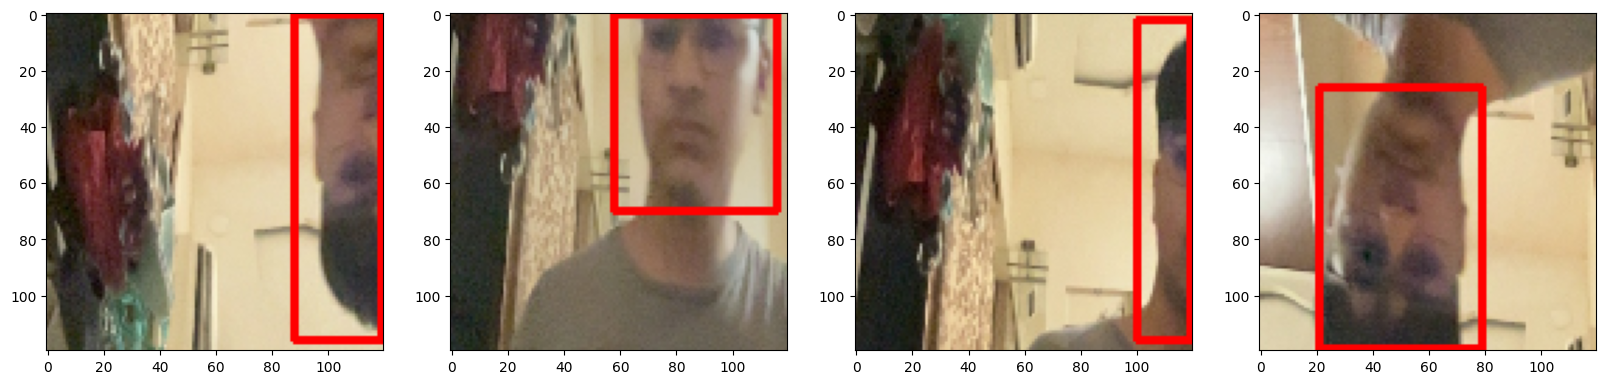

In [184]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)),
                            (255,0,0), 2)

    ax[idx].imshow(sample_image)

In [185]:
from tensorflow.keras.models import load_model
facetracker.save('facetracker.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [187]:
from keras.models import model_from_json

# Assuming `facetracker` is your model
# Serialize model architecture to JSON
model_json = facetracker.to_json()
with open("facetracker.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights to separate file
facetracker.save_weights("facetracker_weights.h5")


In [186]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))

    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)),
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])),
                            (255,0,0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)

    cv2.imshow('EyeTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()